# Regression Trees

- ### A sequence of yes/no decisions are made on each of the explanatory variables
> - ### $horsepower<150$ vs $horsepower\geq 150$
> - ### $displacement <200$ vs $displacement \geq 200$

- ### An objective function is minimized

### $$ \text{RSS} =
\sum_{y_i\in R_1}(y_i - \hat{y}_1)^2 + \cdots + \sum_{y_i\in R_K}(y_i - \hat{y}_K)^2 
= \sum_{j=1}^N \sum_{i=1}^K (y_j - \hat{y}_i)^2\delta(R_i, x_j) $$


> - ### Finds the cut points.
> - ### Minimizes least squares RSS between observed and predicted $y$
- ### When a decision is made, left and right nodes are added in the tree. 
- ### Each subtree divides the explanatory data (the domain) into smaller data sets. 

<img src="./pix/tree-partition-domain-example.png" width=750>

- ### Division stops when partitions in the domain only contain a minimum number number of data points (e.g., 10 data points)
- ### The regression function is a collection of plateaus (i.e., a step function):

<img src="./pix/tree-levels.png" width=300>

- ### Two popular packages: tree, rpart
> - ### they will not always give the same answers


# First we will look at tree

In [1]:
install.packages("tree", repos='http://cran.us.r-project.org')


Installing package into ‘/home/mathman/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [1]:
library(tree)

Use the UCI cars data set

In [2]:
cars=read.table("./../datasets/cars.csv", TRUE, sep=",",na.strings="")
head(cars,10)

mpg,cyl,displ,hp,weight,accel,year,origin,model
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


edit out any rows that have missing data

In [3]:
okcars=na.omit(cars)

Create a tree model for the cars data set

In [4]:
cars.tree.model = tree(mpg ~ displ+hp, data=okcars)

Set plotting parameters to change screen plotting to a 7x4 aspect ratio

In [5]:
library(repr)
options(repr.plot.width=7, repr.plot.height=4)

plot the decision tree. If you don't reset the plotting parameters, the plot will be very TALL

The default font size is (12 points)$\times$ (value of cex)

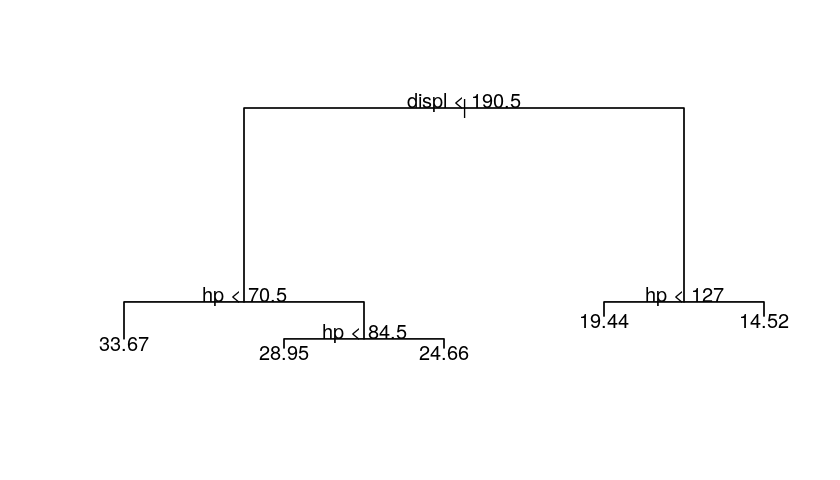

In [8]:
plot(cars.tree.model)
text(cars.tree.model, cex=1.) # cex is a multiplier for font size

In [29]:
pdf("cars-tree-model-plot.pdf",width=7,height=4)
plot(cars.tree.model)
text(cars.tree.model, cex=1.) # cex is a multiplier for font size
dev.off()

png 
  2

Reset the plot size to a square and plot the domain split

plot - plot the hp vs the displacement

partition.tree - plot the domain splitting

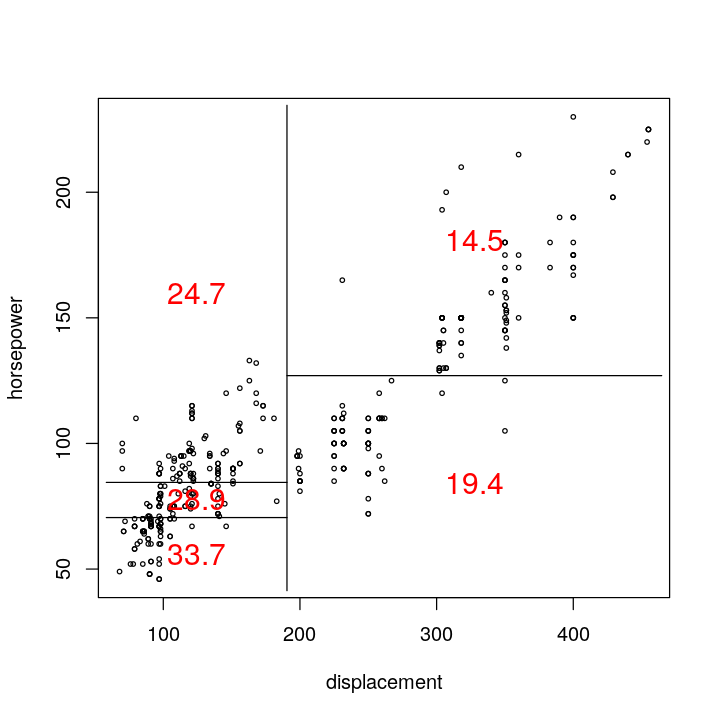

In [31]:
#pdf("cars-partion-tree-plot.pdf",width=6, height=6)
options(repr.plot.width=6, repr.plot.height=6)

plot(okcars$displ, 
     okcars$hp,  
     cex=.5, # this makes the little circles smaller
     ylab="horsepower",
     xlab="displacement")

partition.tree(cars.tree.model, 
               ordvars=c("displ","hp"),
               add=TRUE,  # if this is not set to TRUE, it will erase the first plot!
               cex=1.5,   # cex scales the font size
               col="red")
#dev.off()

In [10]:
summary(cars.tree.model)


Regression tree:
tree(formula = mpg ~ displ + hp, data = okcars)
Number of terminal nodes:  5 
Residual mean deviance:  14.73 = 5699 / 387 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.6700  -2.3510  -0.4378   0.0000   2.1860  18.5600 

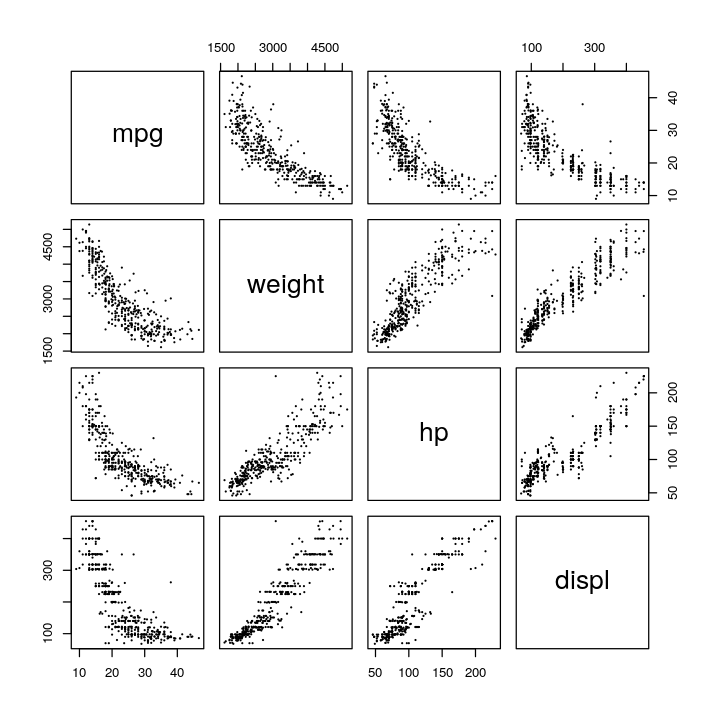

In [11]:
pairs(mpg~weight+hp+displ, data=cars, cex=.1)

# Now repeat the analysis with rpart

In [12]:
library(rpart)

In [13]:
car.model = rpart(mpg ~ displ+hp, data=okcars,method="anova")

The model converges when a complexity parameter reaches a pre-defined value.

The default value is 0.01

To see how this value changes, use printcp. To plot the value, use plotcp.

In [14]:
printcp(car.model)


Regression tree:
rpart(formula = mpg ~ displ + hp, data = okcars, method = "anova")

Variables actually used in tree construction:
[1] displ hp   

Root node error: 23819/392 = 60.763

n= 392 

        CP nsplit rel error  xerror     xstd
1 0.580331      0   1.00000 1.00306 0.061393
2 0.110608      1   0.41967 0.45053 0.038430
3 0.042452      2   0.30906 0.34934 0.030705
4 0.027348      3   0.26661 0.31026 0.029991
5 0.010000      4   0.23926 0.27929 0.026583


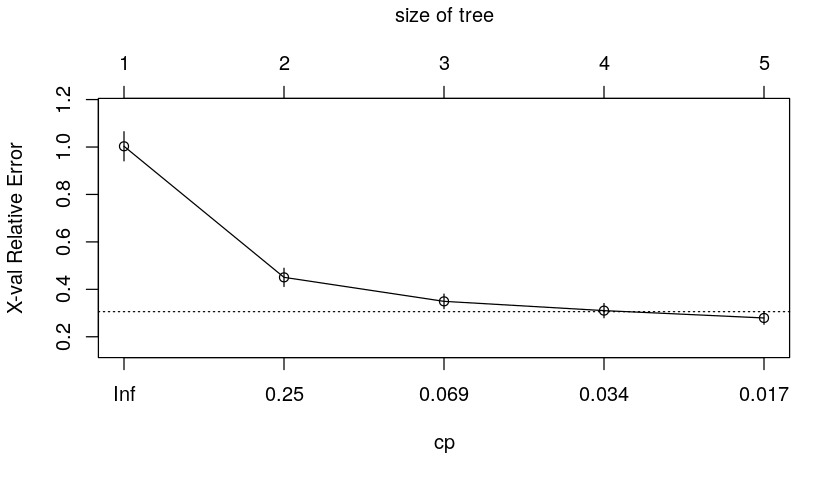

In [17]:
options(repr.plot.width=7, repr.plot.height=4)
plotcp(car.model)

In [21]:
pdf("plotcp-carmodel.pdf", width=7,height=4)
plotcp(car.model)
dev.off()

png 
  2

In [22]:
install.packages("rpart.plot", repos='http://cran.us.r-project.org')

Installing package into ‘/home/mathman/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [23]:
library(rpart.plot)

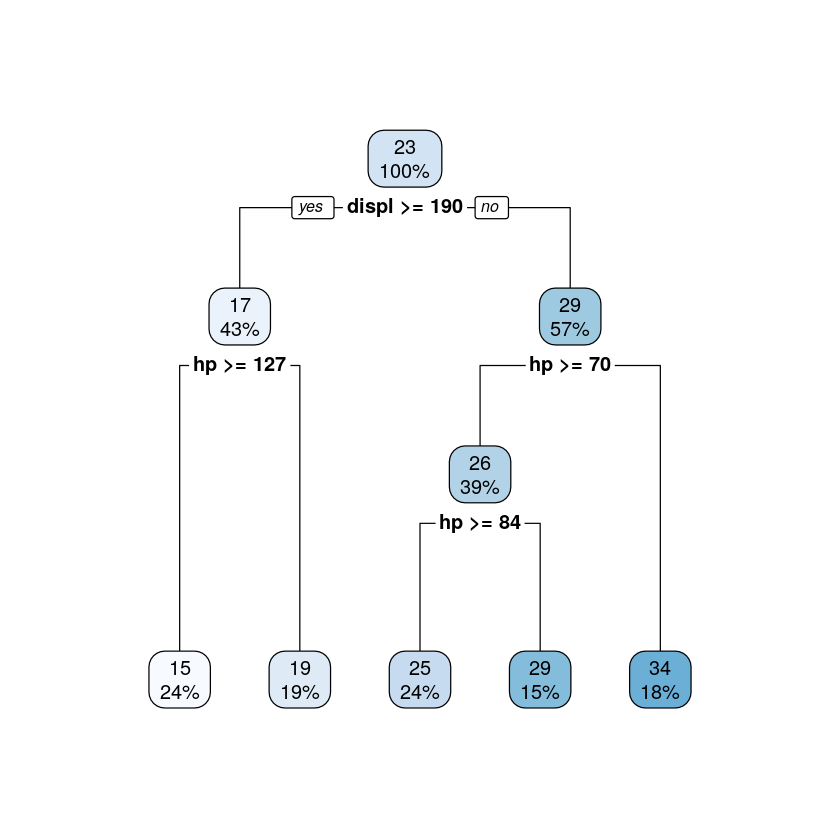

In [26]:
options(repr.plot.width=7, repr.plot.height=7)
rpart.plot(car.model)

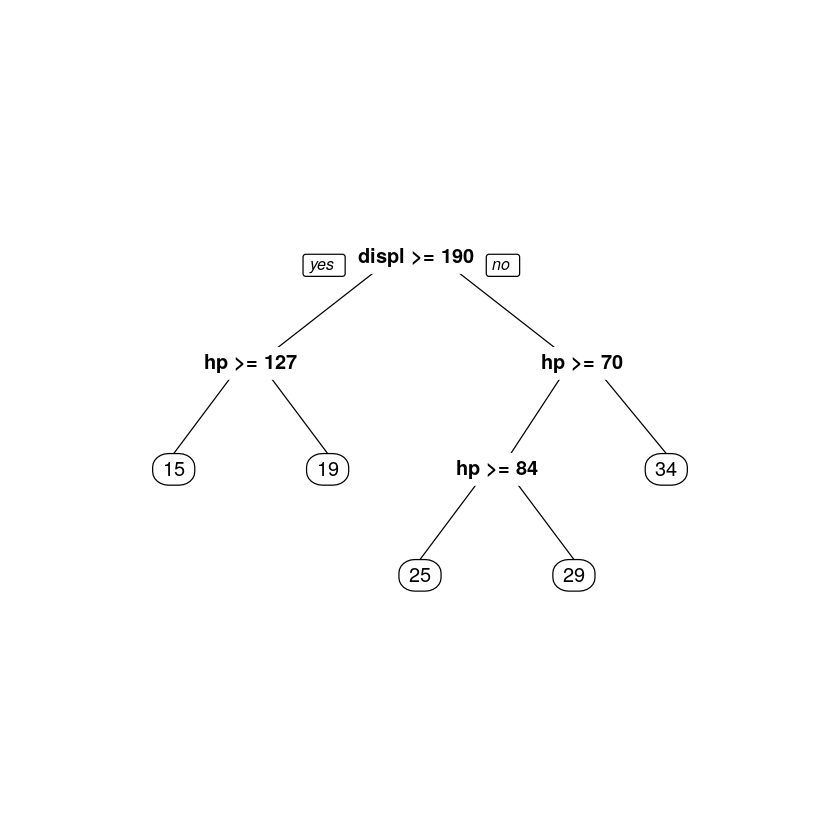

In [27]:
prp(car.model)

In [24]:
pdf("car-model-prpplot.pdf")
prp(car.model)
dev.off()

png 
  2

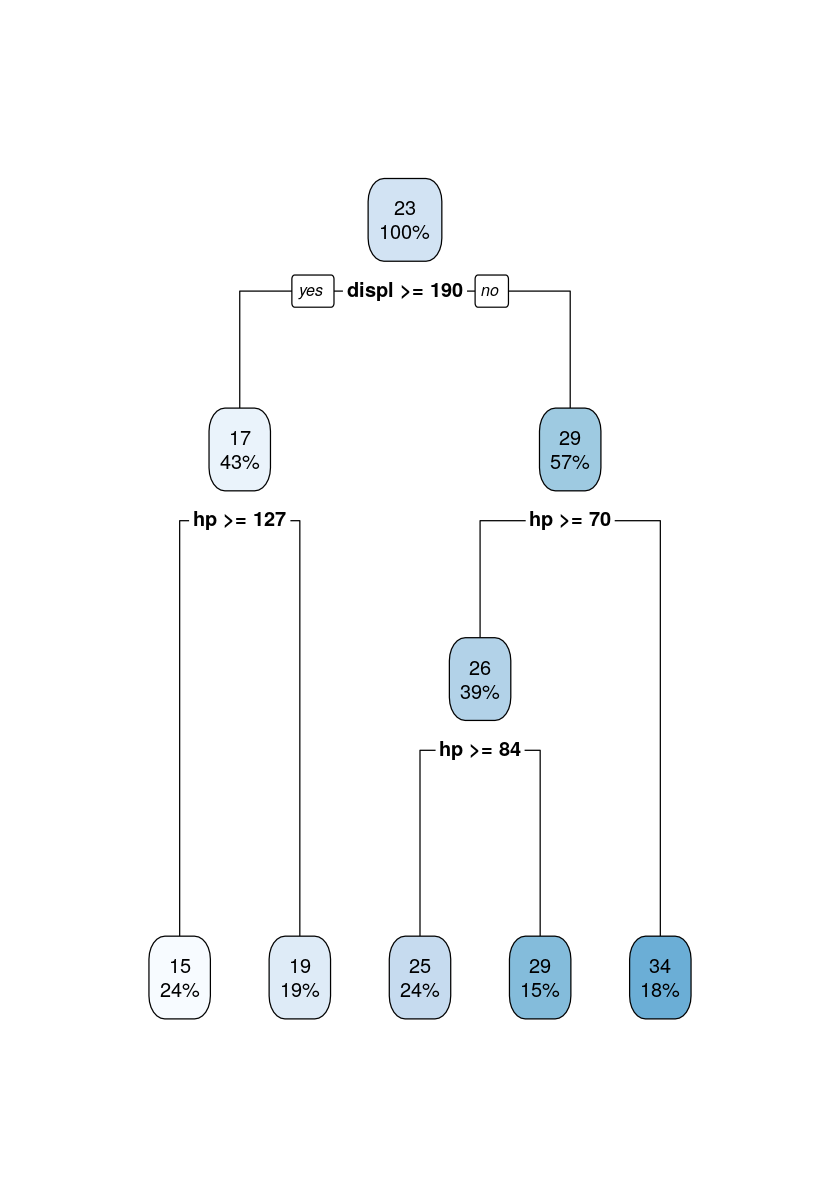

In [25]:
rpart.plot(car.model)

In [26]:
pdf("car-model-rpart-plot.pdf")
rpart.plot(car.model)
dev.off()

png 
  2

In [27]:
car.model

n= 392 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 392 23818.9900 23.44592  
   2) displ>=190.5 170  2210.1880 16.66000  
     4) hp>=127 96   457.0663 14.51875 *
     5) hp< 127 74   741.9541 19.43784 *
   3) displ< 190.5 222  7785.9020 28.64234  
     6) hp>=70.5 151  3347.5600 26.28013  
      12) hp>=84.5 94  1740.8600 24.66277 *
      13) hp< 84.5 57   955.3021 28.94737 *
     7) hp< 70.5 71  1803.7790 33.66620 *

In [31]:
summary(car.model)

Call:
rpart(formula = mpg ~ displ + hp, data = okcars, method = "anova")
  n= 392 

          CP nsplit rel error    xerror       xstd
1 0.58033113      0 1.0000000 1.0052967 0.06171326
2 0.11060764      1 0.4196689 0.4410362 0.03937239
3 0.04245216      2 0.3090612 0.3602300 0.03403584
4 0.02734786      3 0.2666091 0.3219543 0.03280567
5 0.01000000      4 0.2392612 0.2751199 0.02954632

Variable importance
displ    hp 
   55    45 

Node number 1: 392 observations,    complexity param=0.5803311
  mean=23.44592, MSE=60.76274 
  left son=2 (170 obs) right son=3 (222 obs)
  Primary splits:
      displ < 190.5 to the right, improve=0.5803311, (0 missing)
      hp    < 93.5  to the right, improve=0.5146022, (0 missing)
  Surrogate splits:
      hp < 97.5  to the right, agree=0.855, adj=0.665, (0 split)

Node number 2: 170 observations,    complexity param=0.04245216
  mean=16.66, MSE=13.00111 
  left son=4 (96 obs) right son=5 (74 obs)
  Primary splits:
      hp    < 127   to the right, im

In [35]:
car.model$frame

,var,n,wt,dev,yval,complexity,ncompete,nsurrogate
1,displ,392,392,23818.9935,23.44592,0.580331134,1,1
2,hp,170,170,2210.1880,16.66000,0.042452159,1,1
4,<leaf>,96,96,457.0663,14.51875,0.003571044,0,0
5,<leaf>,74,74,741.9541,19.43784,0.004211154,0,0
3,hp,222,222,7785.9020,28.64234,0.110607642,1,1
6,hp,151,151,3347.5604,26.28013,0.027347865,1,1
12,<leaf>,94,94,1740.8597,24.66277,0.007756076,0,0
13,<leaf>,57,57,955.3021,28.94737,0.007537111,0,0
7,<leaf>,71,71,1803.7789,33.66620,0.006606099,0,0


In [36]:
car.model$splits

,count,ncat,improve,index,adj
displ,392,1,0.5803311,190.5,0.0000000
hp,392,1,0.5146022,93.5,0.0000000
hp,0,1,0.8545918,97.5,0.6647059
hp,170,1,0.4575030,127.0,0.0000000
displ,170,1,0.3996759,284.5,0.0000000
displ,0,1,0.9764706,284.5,0.9459459
hp,222,1,0.3383760,70.5,0.0000000
displ,222,1,0.2677383,112.5,0.0000000
displ,0,1,0.8423423,96.5,0.5070423
hp,151,1,0.1945891,84.5,0.0000000


In [37]:
car.model$csplits

NULL


Regression tree:
rpart(formula = mpg ~ displ + hp, data = okcars, method = "anova")

Variables actually used in tree construction:
[1] displ hp   

Root node error: 23819/392 = 60.763

n= 392 

        CP nsplit rel error  xerror     xstd
1 0.580331      0   1.00000 1.00530 0.061713
2 0.110608      1   0.41967 0.44104 0.039372
3 0.042452      2   0.30906 0.36023 0.034036
4 0.027348      3   0.26661 0.32195 0.032806
5 0.010000      4   0.23926 0.27512 0.029546


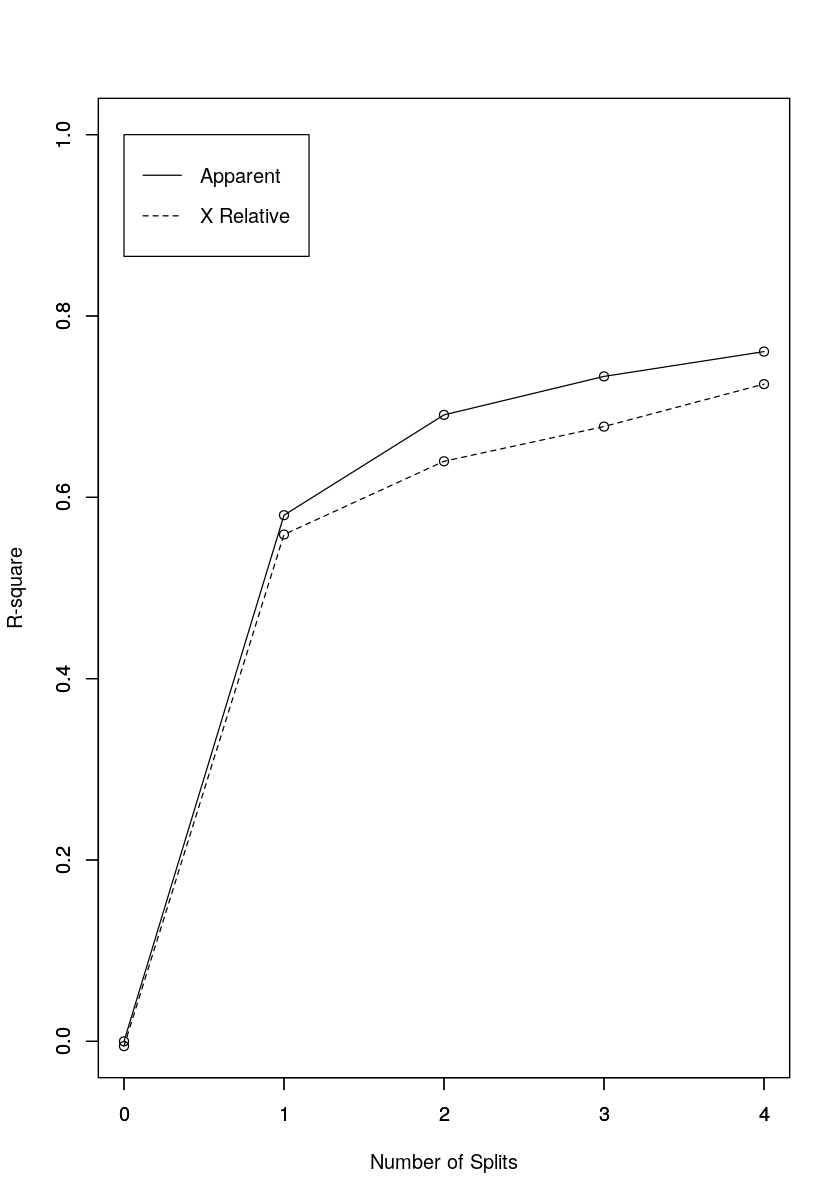

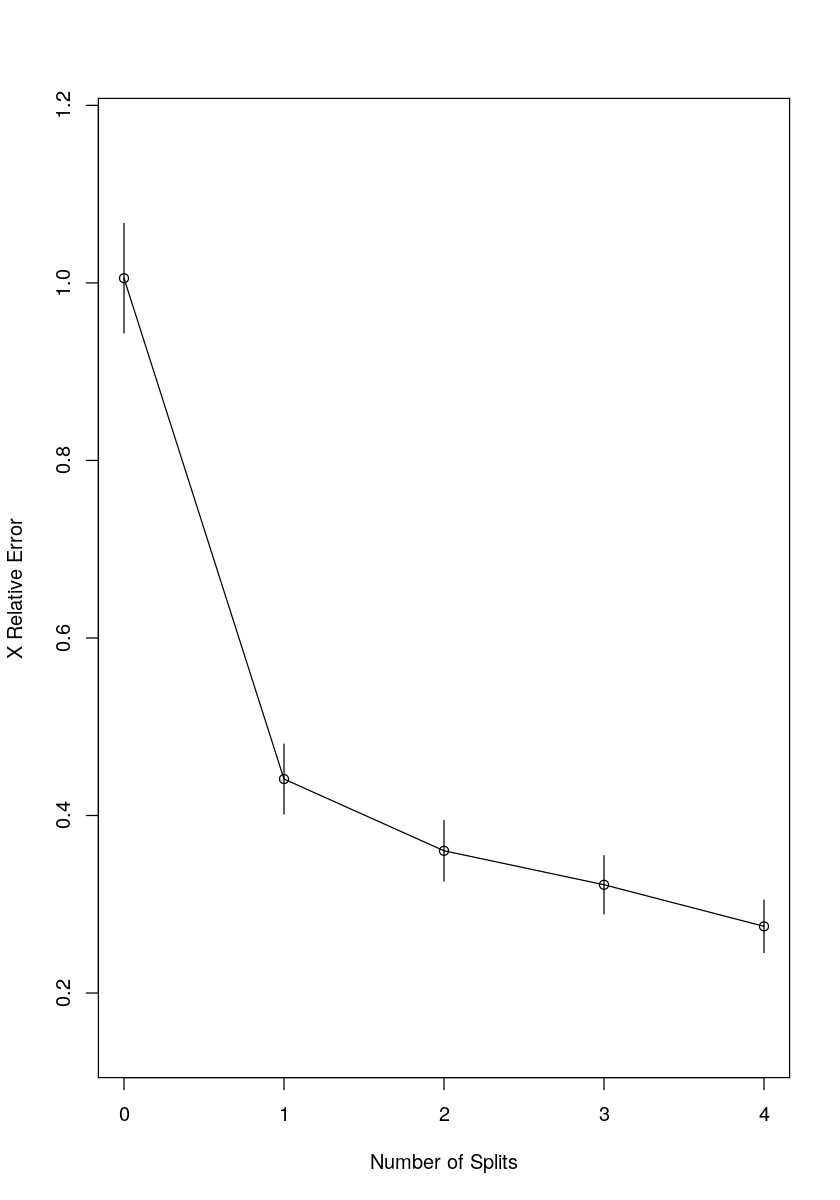

In [38]:
rsq.rpart(car.model)

## Prediction Example

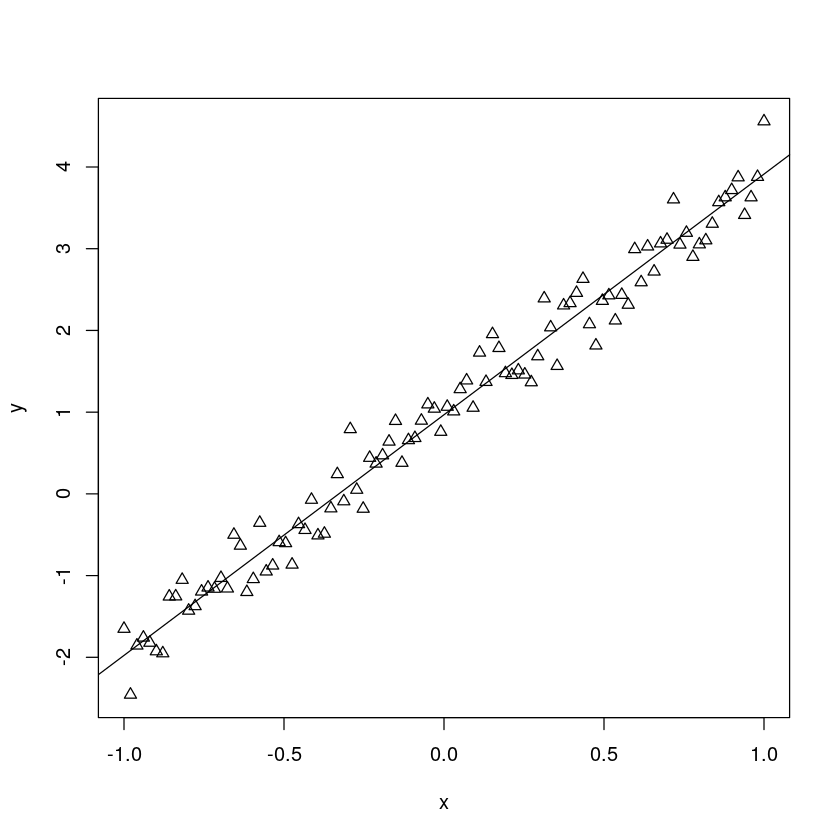

In [56]:
xvals=seq(-1,1,length.out=100)
yvals = 1+3*xvals+rnorm(100,mean=0,sd=.25)
df=data.frame(x=xvals,y=yvals)
model=lm(y~x, data=df)
plot(xvals,yvals,xlab="x",ylab="y", pch=2)
abline(model)
bottom=0; left=0; top=0; right=0
par(mai=c(bottom,left,top,right))
par(family="serif")

In [73]:
pdf("Random-Points-To-Be-Fit-By-Regression-Tree.pdf", height=4, width=7)
plot(xvals,yvals,xlab="x",ylab="y", pch=2)
abline(model)
dev.off()

png 
  2

In [5]:
head(df,5)

x,y
-1.0000000,-1.521216
-0.9797980,-1.946045
-0.9595960,-1.177845
-0.9393939,-2.328415
-0.9191919,-1.941165


In [58]:
library(rpart)

In [59]:
xy.model=rpart(y~x,df,method="anova")

In [60]:
x=seq(-1,1,length.out=1001)
new.xvals=as.data.frame(x)
head(new.xvals,5)

x
-1.000
-0.998
-0.996
-0.994
-0.992


In [68]:
y.predicted=predict(xy.model,new.xvals)#, type="matrix")

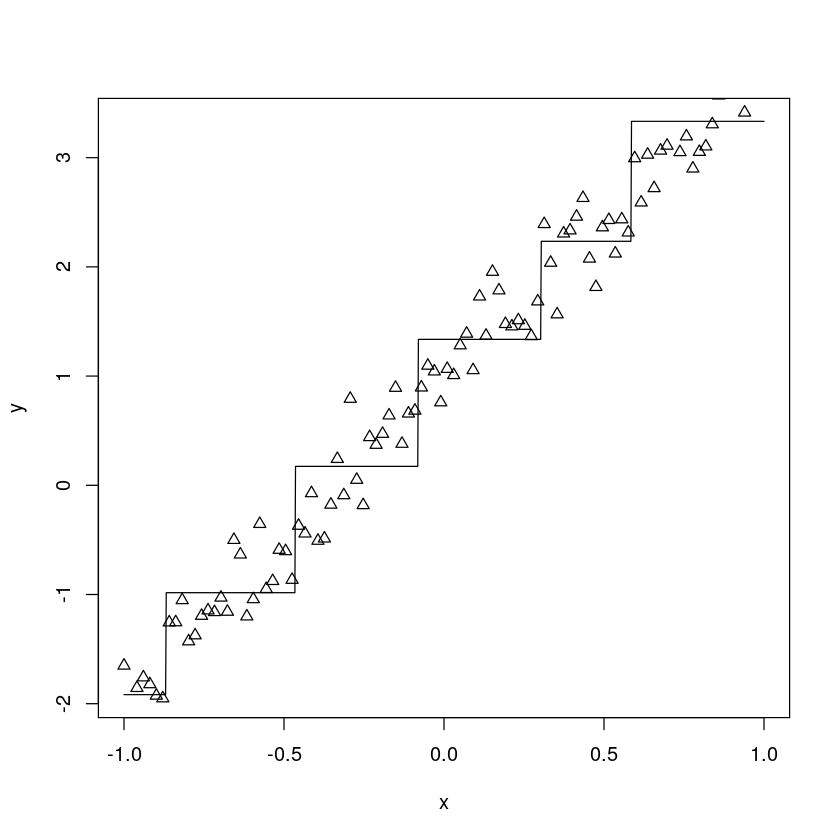

In [69]:
plot(x,y.predicted,type="l", 
     xlab="x",ylab="y")
points(xvals,yvals, pch=2,
  ) 

In [72]:
pdf("regression-tree-plot-for-random-points-about-line.pdf", height=4, width=7)
plot(x,y.predicted,type="l", 
     xlab="x",ylab="y")
points(xvals,yvals, pch=2,
  ) 
dev.off()

png 
  2

In [71]:
head(y.predicted, 5)

1         2         3         4         5 
-1.917432 -1.917432 -1.917432 -1.917432 -1.917432